In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error

In [3]:
data = pd.read_csv('Automobile_data.csv', na_values="?")

In [4]:
print(data.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [5]:
data.shape

(205, 26)

In [6]:
data.iloc[:,:13].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3


In [7]:
data.iloc[:,13:].head()

,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
unique_values_data = pd.DataFrame(data.select_dtypes(include=['object']).copy().apply(pd.unique))
unique_values_data

,0
make,"[alfa-romero, audi, bmw, chevrolet, dodge, hon..."
fuel-type,"[gas, diesel]"
aspiration,"[std, turbo]"
num-of-doors,"[two, four, nan]"
body-style,"[convertible, hatchback, sedan, wagon, hardtop]"
drive-wheels,"[rwd, fwd, 4wd]"
engine-location,"[front, rear]"
engine-type,"[dohc, ohcv, ohc, l, rotor, ohcf, dohcv]"
num-of-cylinders,"[four, six, five, three, twelve, two, eight]"
fuel-system,"[mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]"


In [9]:
dropedna_data = data.dropna()
dropedna_data = dropedna_data.apply(lambda x:  pd.to_numeric(x, errors = 'ignore'))

In [10]:
dropedna_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    float64
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

In [11]:
def _color_red_or_green(val):
    color = 'red' if abs(val) < 0.25 else 'green'
    return 'color: %s' % color

In [12]:
dropedna_data.corr().style.applymap(_color_red_or_green)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,-0.162794
normalized-losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel-base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.760952
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.843371
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,0.244836
curb-weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.893639
engine-size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.841496
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,0.533890
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,0.160664


In [13]:
 data = data.drop(['normalized-losses', 'symboling', 'height', 'stroke', 'compression-ratio', 'peak-rpm', 'highway-mpg'], axis = 1)

In [14]:
data.corr().style.applymap(_color_red_or_green)

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,price
wheel-base,1.000000,0.874587,0.795144,0.776386,0.569329,0.490378,0.352297,-0.470414,0.584642
length,0.874587,1.000000,0.841118,0.877728,0.683360,0.607480,0.555003,-0.670909,0.690628
width,0.795144,0.841118,1.000000,0.867032,0.735433,0.559204,0.642482,-0.642704,0.751265
curb-weight,0.776386,0.877728,0.867032,1.000000,0.850594,0.649045,0.751034,-0.757414,0.834415
engine-size,0.569329,0.683360,0.735433,0.850594,1.000000,0.594090,0.810773,-0.653658,0.872335
bore,0.490378,0.607480,0.559204,0.649045,0.594090,1.000000,0.577273,-0.594584,0.543436
horsepower,0.352297,0.555003,0.642482,0.751034,0.810773,0.577273,1.000000,-0.803620,0.810533
city-mpg,-0.470414,-0.670909,-0.642704,-0.757414,-0.653658,-0.594584,-0.803620,1.000000,-0.686571
price,0.584642,0.690628,0.751265,0.834415,0.872335,0.543436,0.810533,-0.686571,1.000000


In [16]:
data.isnull().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
wheel-base          0
length              0
width               0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
fuel-system         0
bore                4
horsepower          2
city-mpg            0
price               4
dtype: int64

In [14]:
data = data.dropna()

In [15]:
data.shape

(193, 19)

In [16]:
data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111.0,21,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111.0,21,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154.0,19,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102.0,24,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115.0,18,17450.0


In [17]:
category_data = data.select_dtypes(include=['object']).copy()
data = data.drop(list(category_data.columns), axis = 1)
category_data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [18]:
data.shape, category_data.shape

((193, 9), (193, 10))

In [19]:
words_to_nums = {"num-of-doors":     {"four": 4, "two": 2},
                "num-of-cylinders": {"two": 2, "three":3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12 }}

In [20]:
category_data = category_data.replace(words_to_nums)
category_data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [21]:
category_data.nunique()

make                21
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          5
num-of-cylinders     6
fuel-system          7
dtype: int64

In [22]:
category_data = pd.get_dummies(category_data, columns = ['fuel-type', 'aspiration', 'engine-location'])
category_data.head()

,make,num-of-doors,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,engine-location_front,engine-location_rear
0,alfa-romero,2,convertible,rwd,dohc,4,mpfi,0,1,1,0,1,0
1,alfa-romero,2,convertible,rwd,dohc,4,mpfi,0,1,1,0,1,0
2,alfa-romero,2,hatchback,rwd,ohcv,6,mpfi,0,1,1,0,1,0
3,audi,4,sedan,fwd,ohc,4,mpfi,0,1,1,0,1,0
4,audi,4,sedan,4wd,ohc,5,mpfi,0,1,1,0,1,0


In [23]:
category_data = category_data.drop(['fuel-type_diesel','aspiration_std','engine-location_rear'], axis = 1)
category_data.rename({'make':'Model', 'fuel-type_gas':'gas', 'aspiration_turbo':'turbo', 'engine-location_front':'engine_in_front'},axis='columns')

,Model,num-of-doors,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,gas,turbo,engine_in_front
0,alfa-romero,2,convertible,rwd,dohc,4,mpfi,1,0,1
1,alfa-romero,2,convertible,rwd,dohc,4,mpfi,1,0,1
2,alfa-romero,2,hatchback,rwd,ohcv,6,mpfi,1,0,1
3,audi,4,sedan,fwd,ohc,4,mpfi,1,0,1
4,audi,4,sedan,4wd,ohc,5,mpfi,1,0,1
...,...,...,...,...,...,...,...,...,...,...
200,volvo,4,sedan,rwd,ohc,4,mpfi,1,0,1
201,volvo,4,sedan,rwd,ohc,4,mpfi,1,1,1
202,volvo,4,sedan,rwd,ohcv,6,mpfi,1,0,1
203,volvo,4,sedan,rwd,ohc,6,idi,0,1,1


In [24]:
category_data = pd.get_dummies(category_data)
category_data.head()

,num-of-doors,num-of-cylinders,fuel-type_gas,aspiration_turbo,engine-location_front,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,2,4,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,4,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,6,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,4,4,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,4,5,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [25]:
category_data.shape

(193, 46)

In [26]:
data = pd.concat([category_data, data], axis = 1)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num-of-doors            193 non-null    int64  
 1   num-of-cylinders        193 non-null    int64  
 2   fuel-type_gas           193 non-null    uint8  
 3   aspiration_turbo        193 non-null    uint8  
 4   engine-location_front   193 non-null    uint8  
 5   make_alfa-romero        193 non-null    uint8  
 6   make_audi               193 non-null    uint8  
 7   make_bmw                193 non-null    uint8  
 8   make_chevrolet          193 non-null    uint8  
 9   make_dodge              193 non-null    uint8  
 10  make_honda              193 non-null    uint8  
 11  make_isuzu              193 non-null    uint8  
 12  make_jaguar             193 non-null    uint8  
 13  make_mazda              193 non-null    uint8  
 14  make_mercedes-benz      193 non-null    ui

In [28]:
X = data.drop(['price'], axis = 1)
y = data['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
params = {'max_depth':range(2,4),'min_samples_split':range(25,40), 'min_samples_leaf': range(7,10)}
regressor = tree.DecisionTreeRegressor()
grid_search_cv = GridSearchCV(regressor, params, cv = 5)
grid_search_cv.fit(X_train, y_train)
model1 = grid_search_cv.best_estimator_

In [31]:
y_pred = model1.predict(X_test)
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head()

,Actual,Predicted
49,36000.0,33065.090909
149,11694.0,12929.250000
85,6989.0,10344.409091
156,6938.0,7406.208333
122,7609.0,7406.208333


In [32]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 2318.191169507575
Mean Squared Error: 10943917.086098788
Root Mean Squared Error: 3308.1591687974733


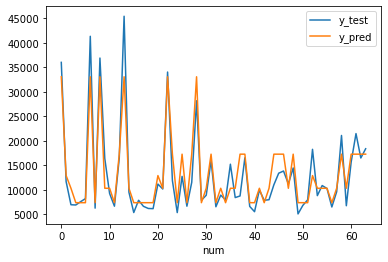

In [33]:
pd.DataFrame({'num':range(len(y_test)),'y_test':y_test, 'y_pred':y_pred}).plot(y = ['y_test','y_pred'], x = 'num');

In [34]:
print('Значение R^2 = ', model1.score(X_test,y_test))

Значение R^2 =  0.8606803933966539


In [35]:
print('Значение R^2 = ', model1.score(X_train,y_train))

Значение R^2 =  0.9033292763133687


In [36]:
params = {'n_estimators':[10],'max_depth':range(2,4),'min_samples_split':range(25,40), 'min_samples_leaf': range(7,10)}
regressor = RandomForestRegressor()
grid_search_cv = GridSearchCV(regressor, params, cv = 5)
grid_search_cv.fit(X_train, y_train)
model2 = grid_search_cv.best_estimator_

In [37]:
y_pred = model2.predict(X_test)
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head()

,Actual,Predicted
49,36000.0,31323.347193
149,11694.0,11481.048617
85,6989.0,10587.399930
156,6938.0,7177.211430
122,7609.0,7811.188536


In [38]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2313.460223839598
Mean Squared Error: 12354334.717801712
Root Mean Squared Error: 3514.873357292082


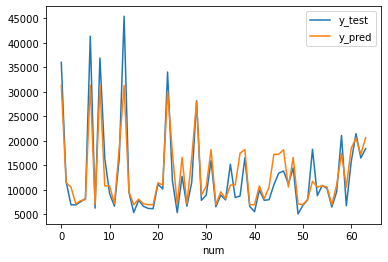

In [39]:
pd.DataFrame({'num':range(len(y_test)),'y_test':y_test, 'y_pred':y_pred}).plot(y = ['y_test','y_pred'], x = 'num');

In [40]:
print('Значение R^2 = ', model2.score(X_test,y_test))

Значение R^2 =  0.8427253204507092


In [41]:
print('Значение R^2 = ', model2.score(X_train,y_train))

Значение R^2 =  0.8972956202118647
